In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Load the customer and transaction data
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# Merge the customer and transaction data on CustomerID to get all necessary information in one place
merged_data = transactions.merge(customers, on="CustomerID")

In [5]:
# Summarize total purchase value and quantity per customer
segmentation_data = merged_data.groupby("CustomerID")[["TotalValue", "Quantity"]].sum()

In [6]:
# Add customer profile information (like Region) to the segmentation data
segmentation_data = segmentation_data.merge(customers.set_index("CustomerID"), left_index=True, right_index=True)

In [7]:
# Convert categorical data (like Region) to numeric values for clustering
le = LabelEncoder()
segmentation_data["Region"] = le.fit_transform(segmentation_data["Region"])

In [8]:
# Standardize the data (make sure all features are on a similar scale) for better clustering results
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmentation_data.drop(columns=["CustomerName", "SignupDate"]))

In [9]:
# Apply KMeans clustering with 5 clusters. You can choose different cluster counts, but we're using 5 for this task
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

c:\Users\wwwta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
# Assign the cluster labels to the segmentation data
segmentation_data["Cluster"] = clusters

In [11]:
# Calculate the Davies-Bouldin Index to evaluate the quality of our clusters
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 0.9039


In [12]:
# Save the results, including cluster assignments, into a CSV file for further analysis
segmentation_data.to_csv("Customer_Segments.csv", index=False)

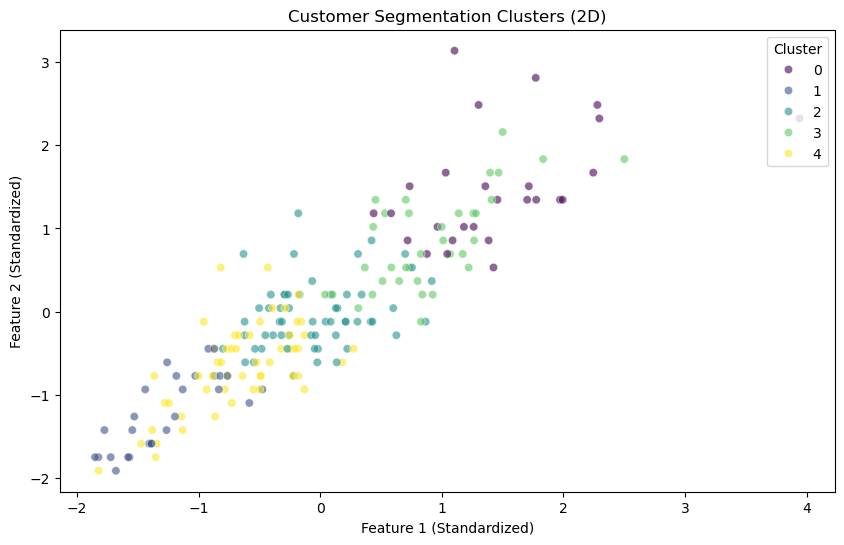

In [13]:
# First, we'll plot a simple 2D scatter plot using the first two standardized features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters, palette="viridis", alpha=0.6)
plt.title("Customer Segmentation Clusters (2D)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend(title="Cluster", loc="upper right")
plt.show()

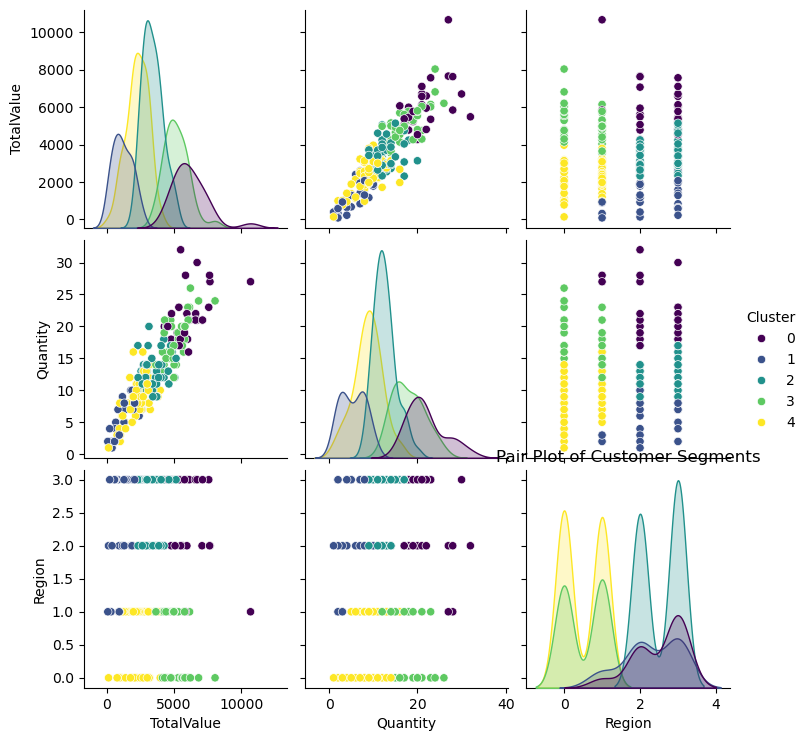

In [14]:
# Next, let's visualize relationships between all the features using a pair plot
sns.pairplot(segmentation_data, hue="Cluster", palette="viridis")
plt.title("Pair Plot of Customer Segments")
plt.show()

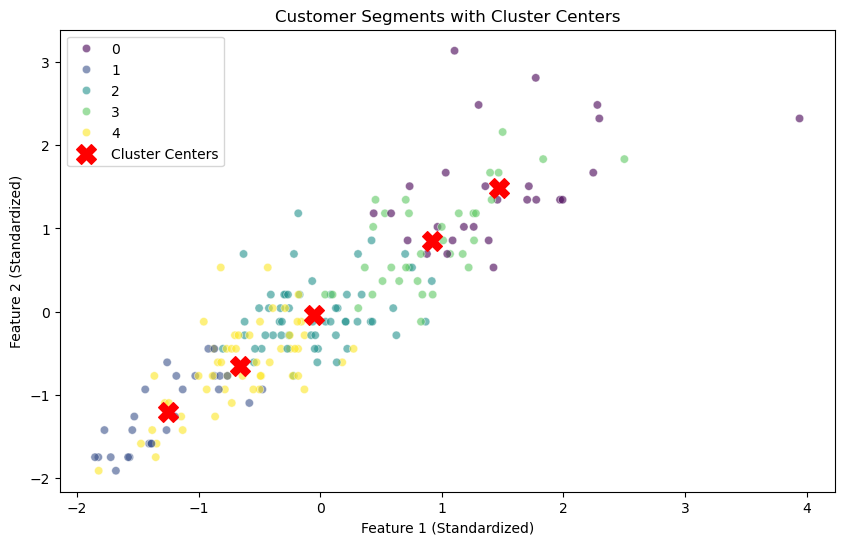

In [15]:
# We can also visualize the cluster centers on top of the 2D scatter plot for clarity
centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters, palette="viridis", alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label="Cluster Centers")
plt.title("Customer Segments with Cluster Centers")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.show()

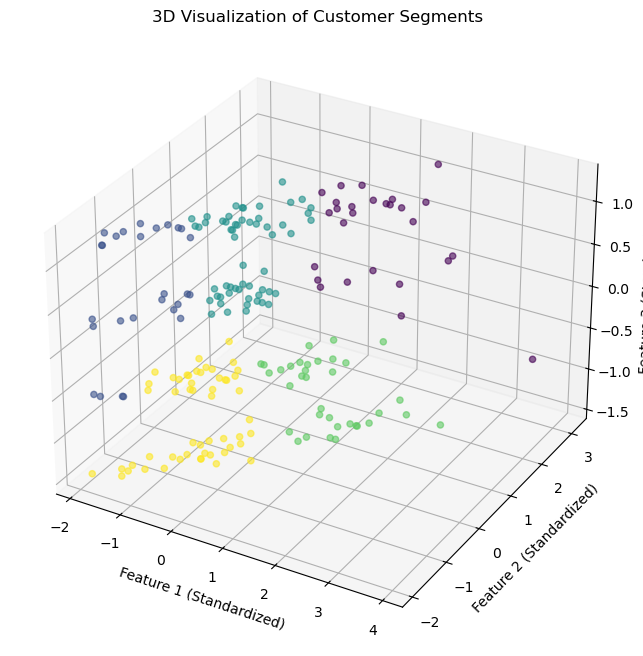

In [16]:
# If there are more than two features after scaling, we can visualize the data in 3D
if scaled_data.shape[1] >= 3:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c=clusters, cmap="viridis", alpha=0.6)
    ax.set_xlabel("Feature 1 (Standardized)")
    ax.set_ylabel("Feature 2 (Standardized)")
    ax.set_zlabel("Feature 3 (Standardized)")
    plt.title("3D Visualization of Customer Segments")
    plt.show()

c:\Users\wwwta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wwwta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wwwta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wwwta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

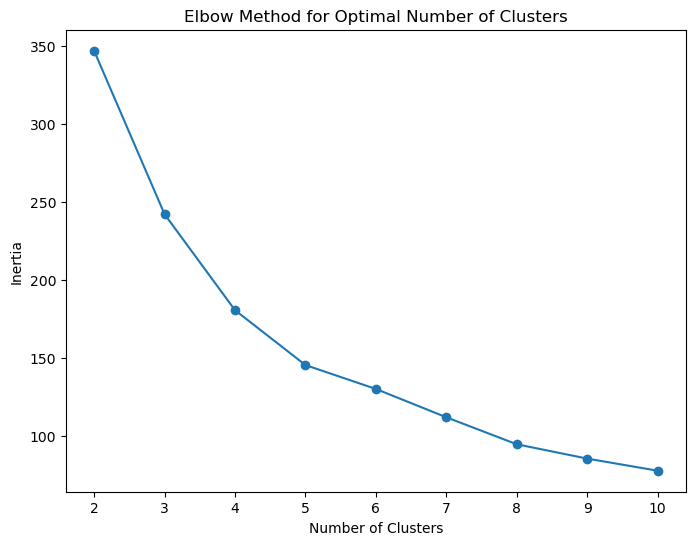

In [17]:
# To help determine the best number of clusters, let's plot the inertia values for different cluster counts
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

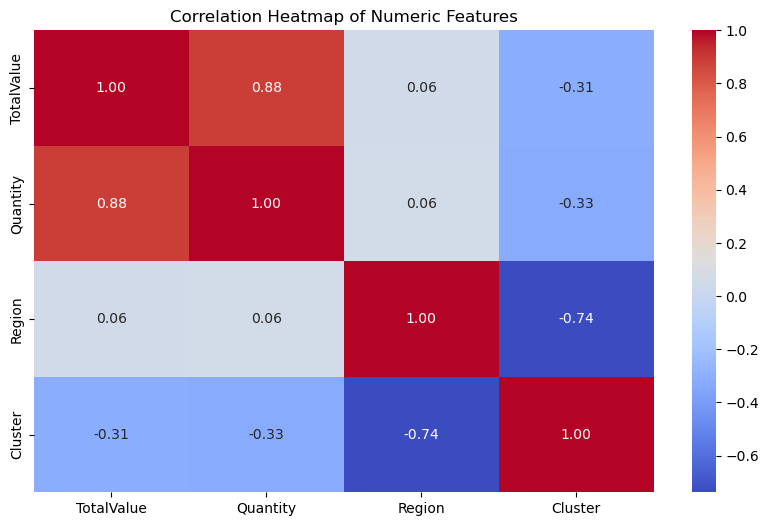

In [20]:
# We only want to use numeric columns for the correlation heatmap to avoid any issues
# Non-numeric columns like "CustomerName" and "Region" are not useful here, so let's focus on the numeric ones.
numeric_data = segmentation_data.select_dtypes(include=[float, int])

# Now, let's generate the correlation heatmap to see how the numeric features relate to each other
# This will help us understand how features like TotalValue and Quantity are correlated with one another
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f") 
plt.title("Correlation Heatmap of Numeric Features")
plt.show()